In [ ]:
# Create AI generated QR code
# ControlNet: DionTimmer/controlnet_qrcode-control_v1p_sd15

In [4]:
#!pip install diffusers
#!pip install qrcode
#!pip install transformers
#!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 11.4 MB/s eta 0:00:00


In [11]:
import torch
import qrcode
from diffusers import StableDiffusionControlNetPipeline,  ControlNetModel
import xformers
from PIL import Image

In [2]:
controlnet = ControlNetModel.from_pretrained(
    "DionTimmer/controlnet_qrcode-control_v1p_sd15",
    torch_dtype=torch.float16,
)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [7]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    safety_checker=None,
).to("cuda")
#pipe.enable_xformers_memory_efficient_attention()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [9]:
def generate_qr_code(content):
  qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=16,
        border=0,
    )
  qr.add_data(content)
  qr.make(fit=True)
  img = qr.make_image(fill_color="black", back_color="white")

  offset_min = 8 * 16
  w, h = img.size
  w = (w + 255 + offset_min) // 256 * 256
  h = (h + 255 + offset_min) // 256 * 256
  if w > 1024:
      raise ValueError("QR code is too large, please use a shorter content")
  bg = Image.new('L', (w, h), 255)

  coords = ((w - img.size[0]) // 2 // 16 * 16, (h - img.size[1]) // 2 // 16 * 16)
  bg.paste(img, coords)
  return bg

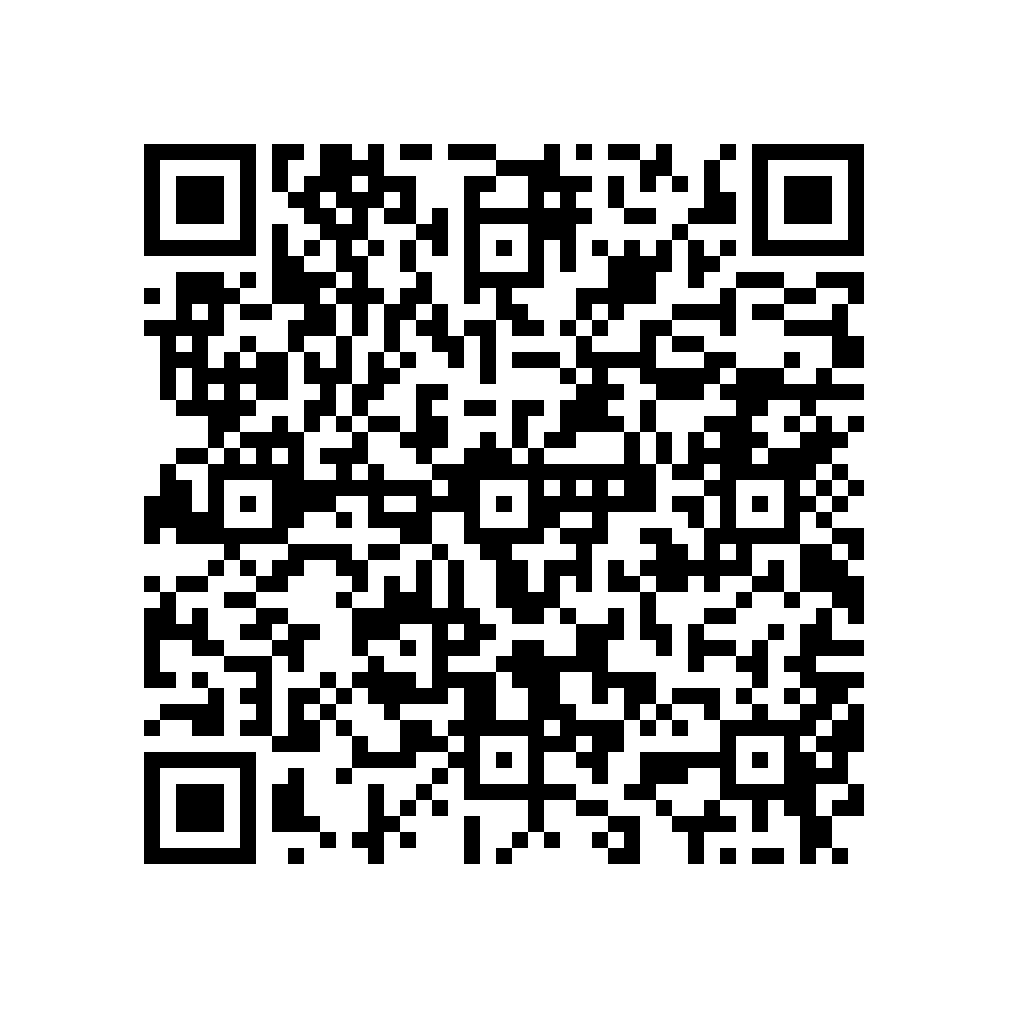

In [13]:
#generate_qr_code("http://arunitasportfolio.s3-website-us-east-1.amazonaws.com/")

In [14]:
prompt = ""
negative_prompt = ""
qrcode_content = "http://arunitasportfolio.s3-website-us-east-1.amazonaws.com/"
qrcode_image = generate_qr_code(qrcode_content)

In [22]:
generator = torch.Generator()
output = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=qrcode_image,
    width=qrcode_image.width,
    height=qrcode_image.height,
    guidance_scale=7,
    controlnet_conditioning_scale=3.50,
    generator=generator,
    num_inference_steps=40,
)

  0%|          | 0/40 [00:00<?, ?it/s]

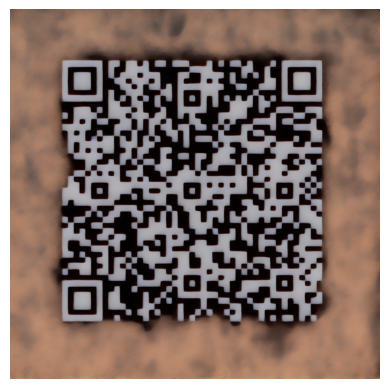

In [26]:
#Show the qr code as image
from matplotlib import pyplot as plt
plt.grid(False)
plt.axis("off")
plt.imshow(output.images[0])
plt.show()